# Building a Google Lens Web Application for Landmark Detection

# Installation

In [1]:
!pip install -q gradio

     |████████████████████████████████| 3.4 MB 16.0 MB/s 
     |████████████████████████████████| 1.9 MB 44.4 MB/s 
     |████████████████████████████████| 206 kB 49.7 MB/s 
     |████████████████████████████████| 961 kB 51.5 MB/s 
     |████████████████████████████████| 3.0 MB 64.7 MB/s 
     |████████████████████████████████| 63 kB 2.8 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import gradio as gr
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

**Load the model**

In [3]:
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_URL = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
IMAGE_SHAPE = (321, 321)

In [4]:
classifier = tf.keras.Sequential([hub.KerasLayer(TF_MODEL_URL,
                                                 input_shape=IMAGE_SHAPE+(3,),
                                                 output_key="predictions:logits")])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
df = pd.read_csv(LABEL_MAP_URL)

In [6]:
label_map = dict(zip(df.id, df.name))

In [16]:
img_loc = "/content/taj-mahal-2.jpg"

In [17]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

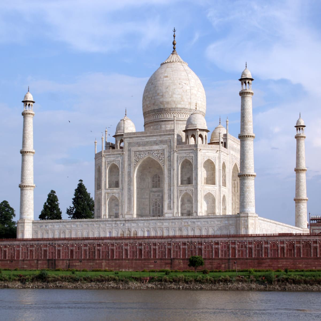

In [18]:
img

In [19]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [20]:
img = img[np.newaxis, ...]

In [21]:
img.shape

(1, 321, 321, 3)

In [22]:
result = classifier.predict(img)

In [23]:
result

array([[ 0.26017827,  0.18421452, -0.10653427, ..., -0.05812633,
         0.04477595,  0.11376505]], dtype=float32)

In [24]:
label_map[np.argmax(result)]

'Taj Mahal'

**Define prediction Function**

In [25]:
class_names=list(label_map.values())

In [26]:
class_names

['Bagha Shahi Mosque',
 'City Palace',
 'The Immaculate Conception Cathedral of Cubao',
 'City of David',
 'Noor Mahal',
 'City of David',
 'Shree Muktinath Temple, Nepal',
 'Shivpuri Nagarjun National Park',
 'Nankin-machi',
 'Khao Sok National Park',
 'Mt. Goryu',
 'Milk Grotto Church',
 'Gili Trawangan',
 'Htukkant Thein Temple',
 'Yabakei Dam',
 'St. Francis of Assisi Parish Church',
 'Saint Hripsime Church',
 'Ranipuram',
 "St. Joseph's Church, Beijing",
 'Tower of David',
 'Sandiaojiao Lighthouse',
 'Ngong Ping 360',
 'Chhatrapati Shivaji Terminus',
 'Sea of Galilee',
 'Khor Virab',
 'Shanti Stupa',
 'Sevanavank',
 'Izmenchivoye',
 'מצפה גדות',
 'Autumn-Admiring Pavilion',
 'Lohagad Fort',
 "Humble Administrator's Garden",
 'Tiananmen Square',
 'Sree Thanumalayan Temple',
 'Menara Kuala Lumpur',
 'Lok Virsa Heritage Museum',
 'Batu Caves',
 'Khram Vo Imya Spasa Nerukotvornogo Obraza',
 'Lin Ma Hang',
 'Mount Arayat',
 'Daulatabad fort',
 'ارگ کریمخان',
 'Stalactite Cave Nature Re

In [27]:
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

**Build a shareable UI in 3 lines of code!**

In [ ]:
image = gr.inputs.Image(shape=(321, 321))
label = gr.outputs.Label(num_top_classes=1)

gr.Interface(
    classify_image, 
    image, 
    label,
    capture_session=True).launch(debug=True);

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://19204.gradio.app
Interface loading below...
